# Лабораторная работа 3

## Деревья решений. Классификатор пола по голосу

Работу выполнила Зухир Амира Саидовна ИВТ 1.2

In [ ]:
%pip install pandas matplotlib seaborn numpy scikit-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn import model_selection 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [3]:
voice_data = pd.read_csv('./data/voice_gender.csv')

print(f"Количество пропущенных: {voice_data.isnull().sum().sum()}")

features = voice_data.drop('label', axis=1).columns
X, y = voice_data[features], voice_data['label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Test выборка:', X_train.shape)
print('Train выборка:', X_test.shape)

Количество пропущенных: 0
Test выборка: (2534, 20)
Train выборка: (634, 20)


# Модель DecisionTreeClassifier с глубиной 1

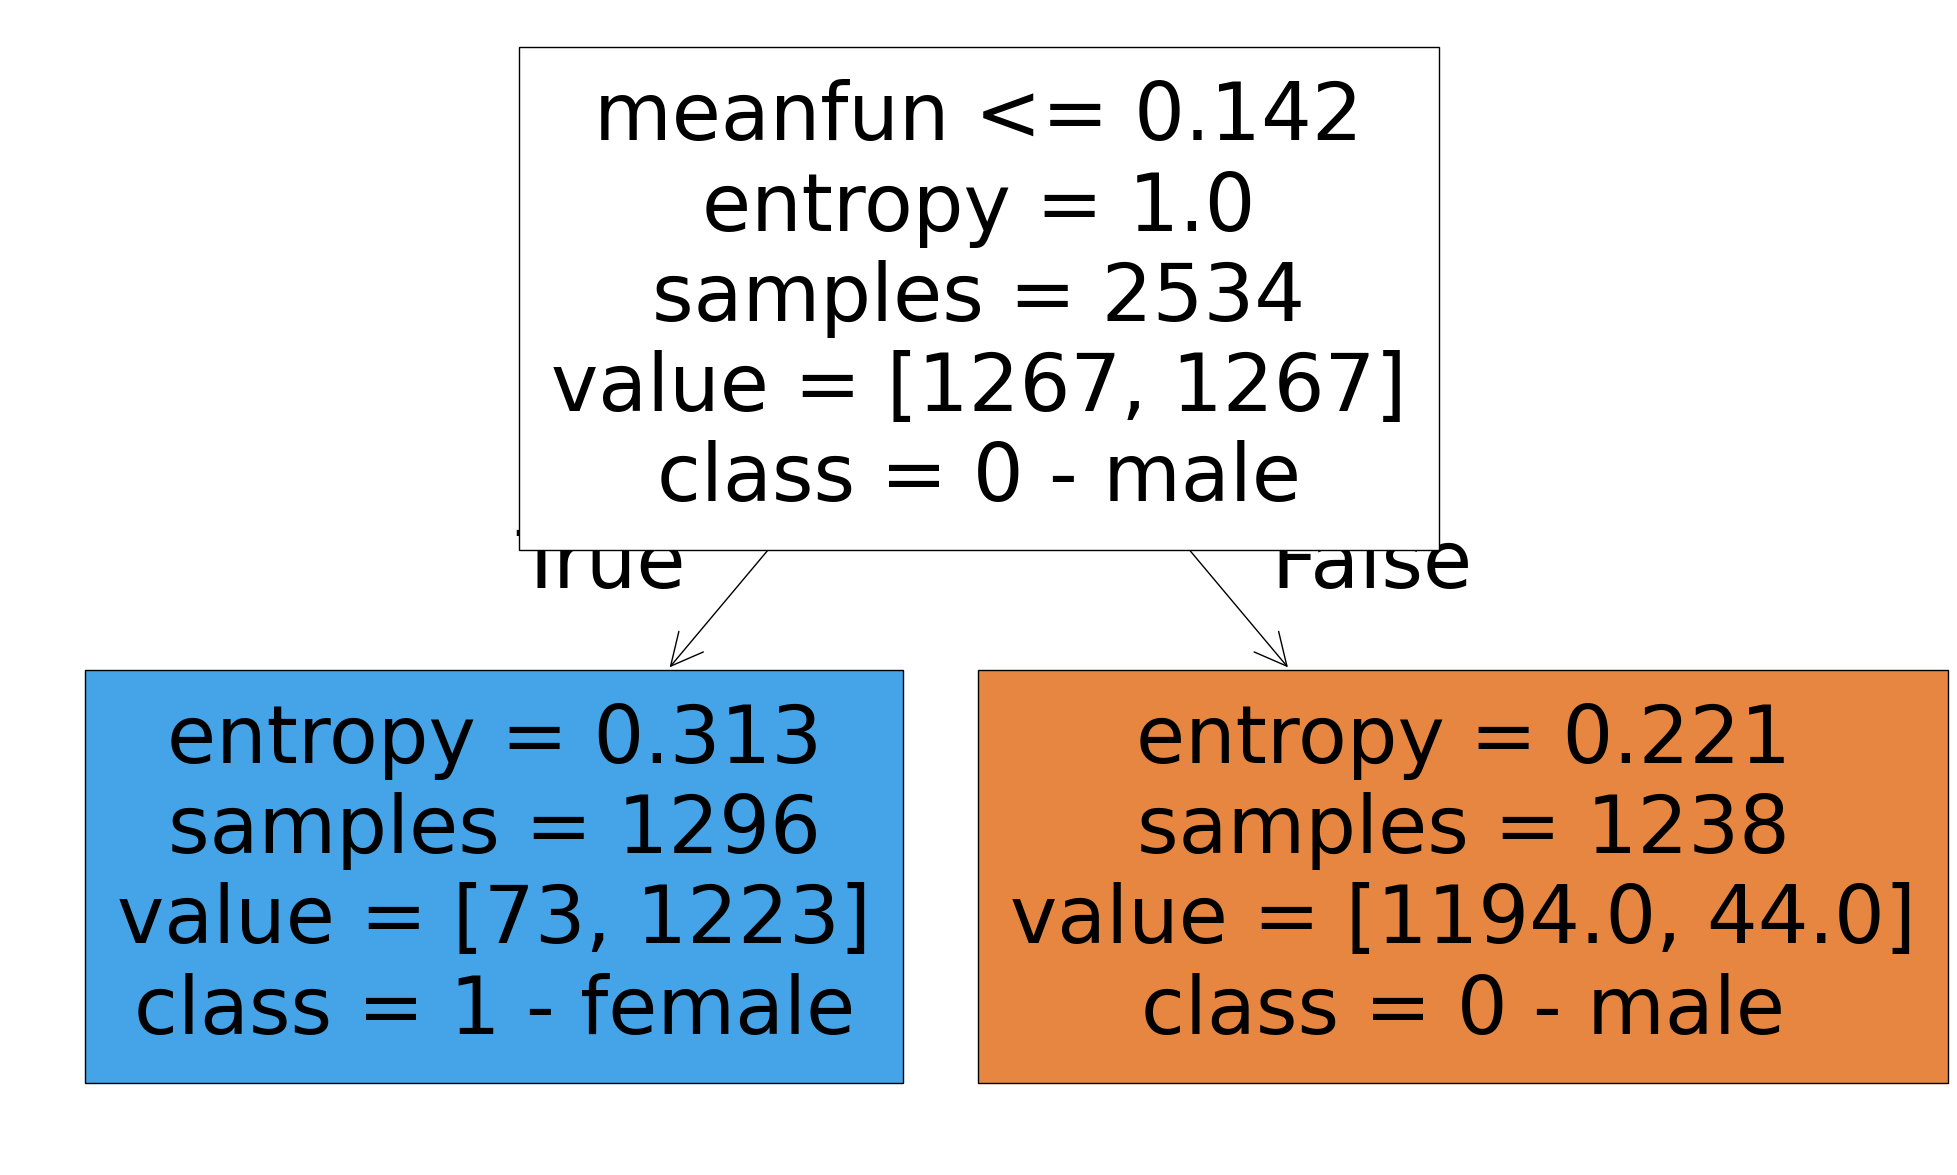

In [4]:
model_depth1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
model_depth1.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_depth1, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

In [5]:
y_pred_depth1 = model_depth1.predict(X_test)
accuracy_depth1 = accuracy_score(y_test, y_pred_depth1)
print("Точность модели с глубиной 1:", round(accuracy_depth1, 3))

Точность модели с глубиной 1: 0.956


# Модель DecisionTreeClassifier с глубиной 2

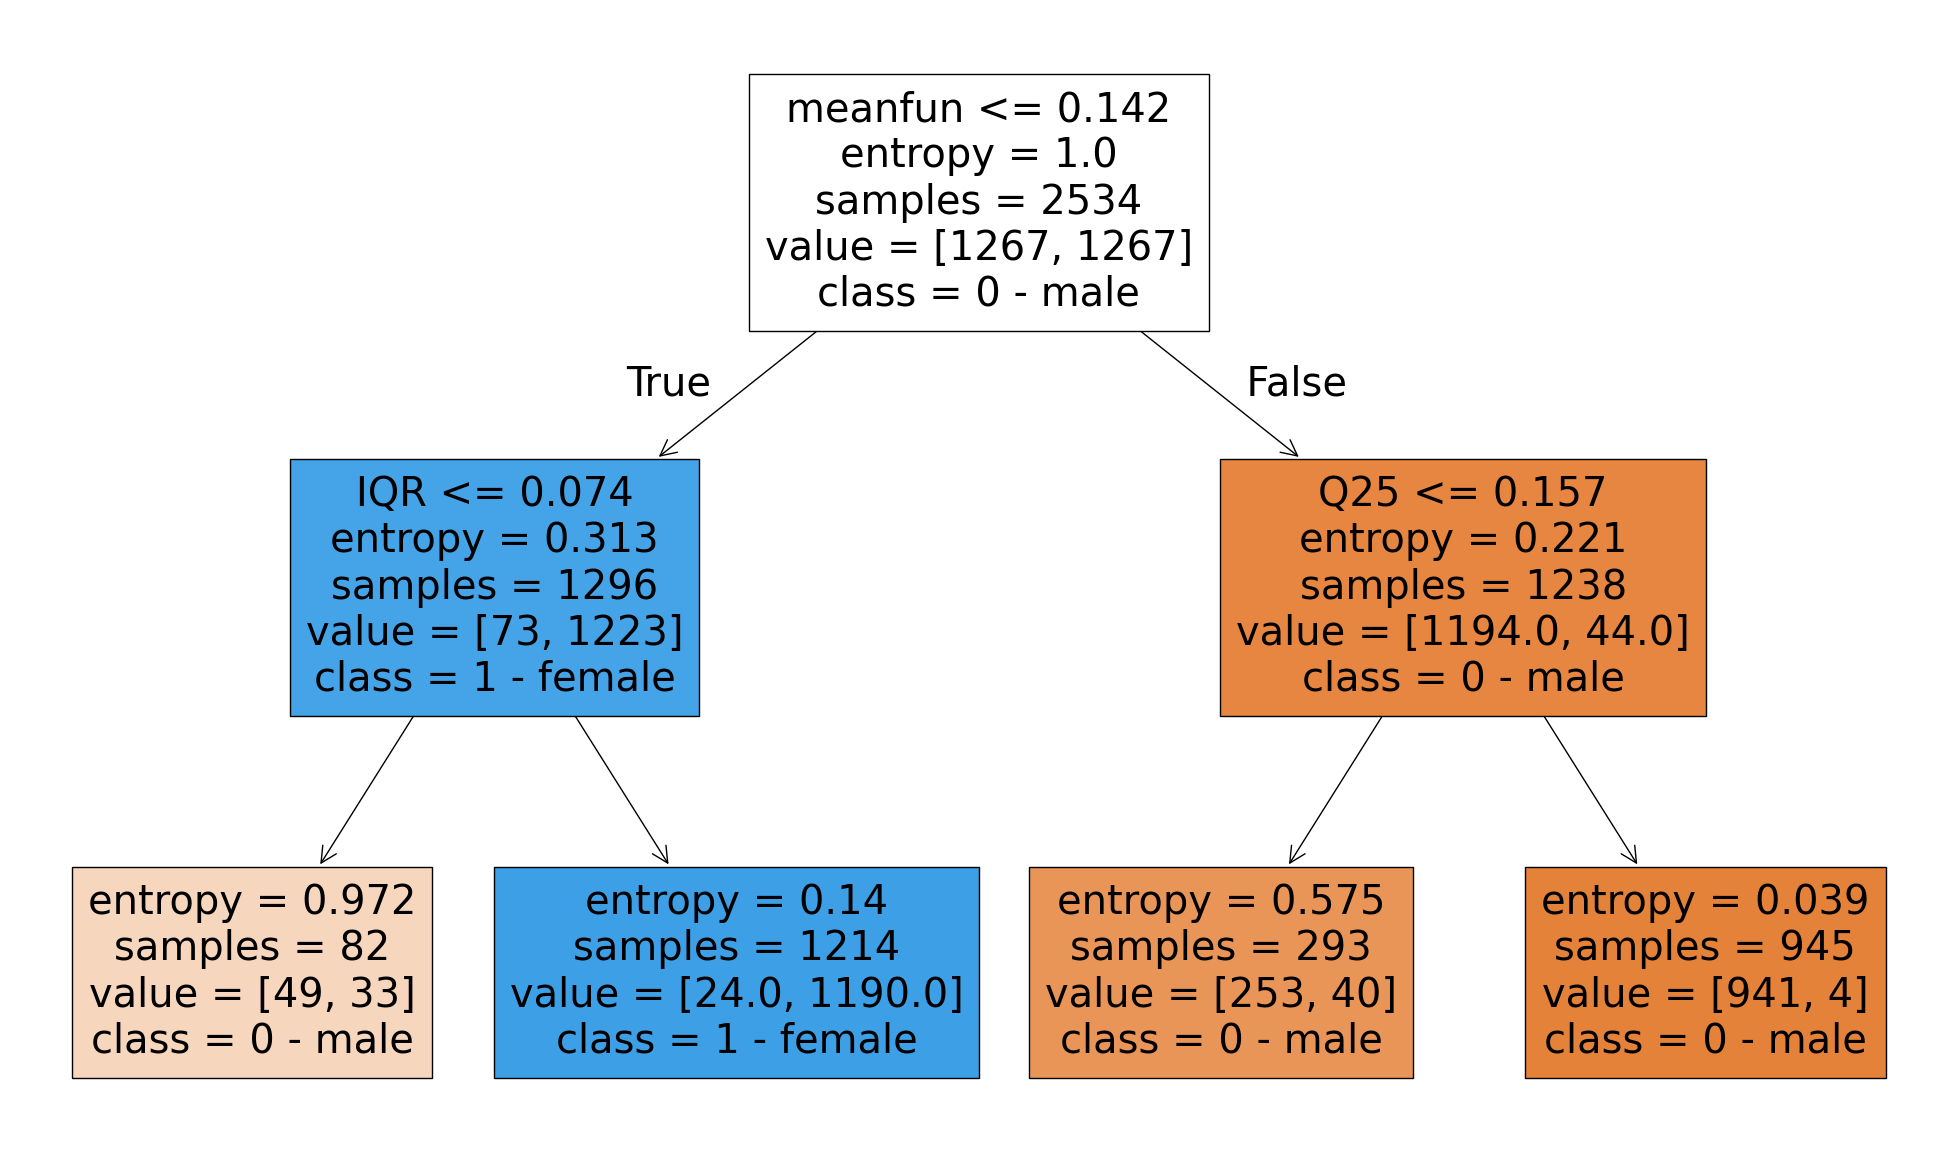

In [6]:
model_depth2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model_depth2.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_depth2, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

In [7]:

y_pred_depth2 = model_depth2.predict(X_test)
accuracy_depth2 = accuracy_score(y_test, y_pred_depth2)
print("Точность модели с глубиной 2:", round(accuracy_depth2, 3))

Точность модели с глубиной 2: 0.962


# Создаём и обучаем свободную модель DecisionTreeClassifier

In [8]:
model_unrestricted = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
model_unrestricted.fit(X_train, y_train)

depth = model_unrestricted.get_depth()
n_leaves = model_unrestricted.get_n_leaves()
print(f'Глубина дерева: {depth}')
print(f'Количество листьев: {n_leaves}')

Глубина дерева: 12
Количество листьев: 54


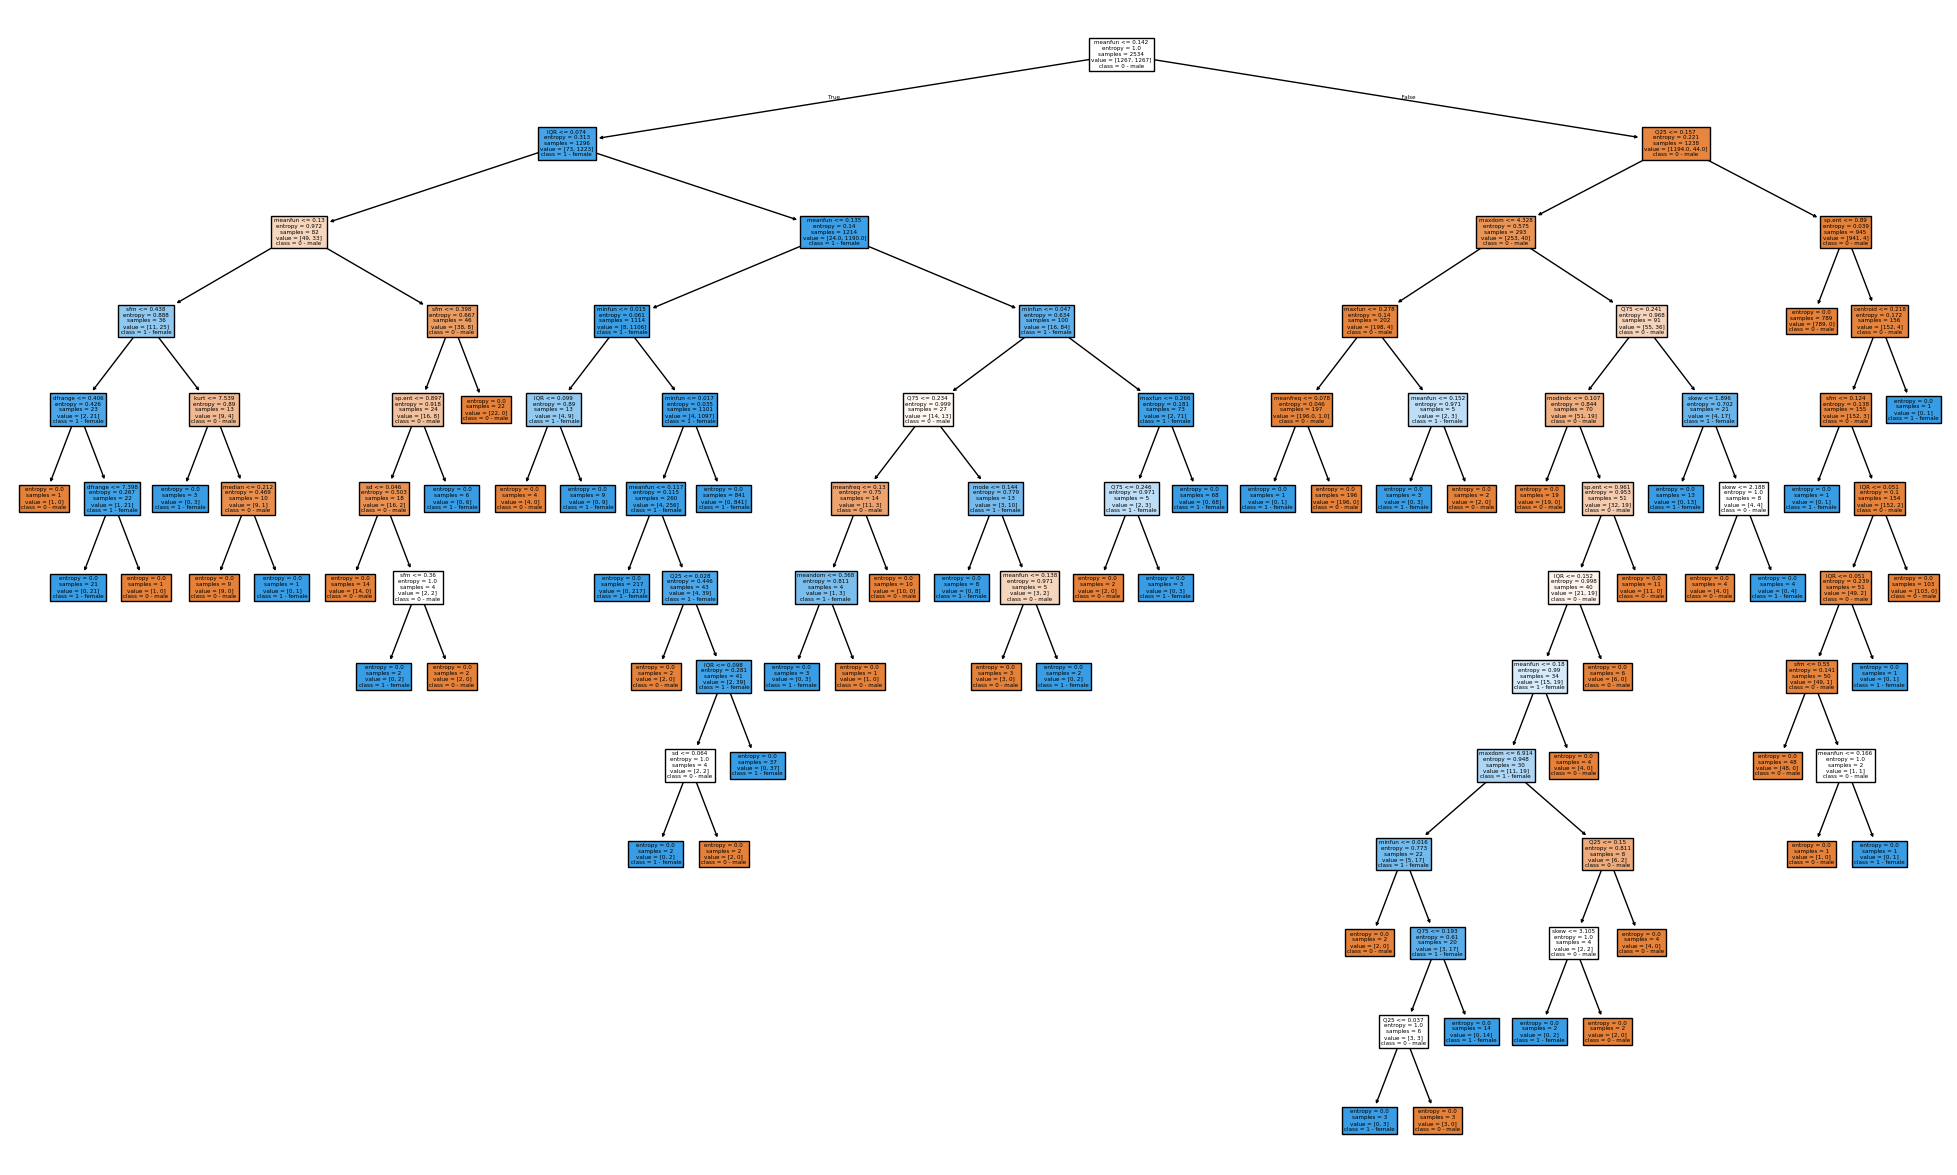

In [9]:

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_unrestricted, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

In [10]:

y_pred_unrestricted_test = model_unrestricted.predict(X_test)
y_pred_unrestricted_train = model_unrestricted.predict(X_train)
accuracy_unrestricted_test = accuracy_score(y_test, y_pred_unrestricted_test)
accuracy_unrestricted_train = accuracy_score(y_train, y_pred_unrestricted_train)

In [11]:
print("Точность свободной модели на тестовой выборке:", round(accuracy_unrestricted_test, 3))
print("Точность свободной модели на тренировочной выборке:", round(accuracy_unrestricted_train, 3))

Точность свободной модели на тестовой выборке: 0.973
Точность свободной модели на тренировочной выборке: 1.0


# Поиск оптимальных гиперпараметров с помощью GridSearchCV

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [13]:
print("Лучшие параметры:", best_params)
print("Лучшая оценка модели:", best_score)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3}
Лучшая оценка модели: 0.9664561748173789


# Создаём и обучаем оптимальную модель DecisionTreeClassifier

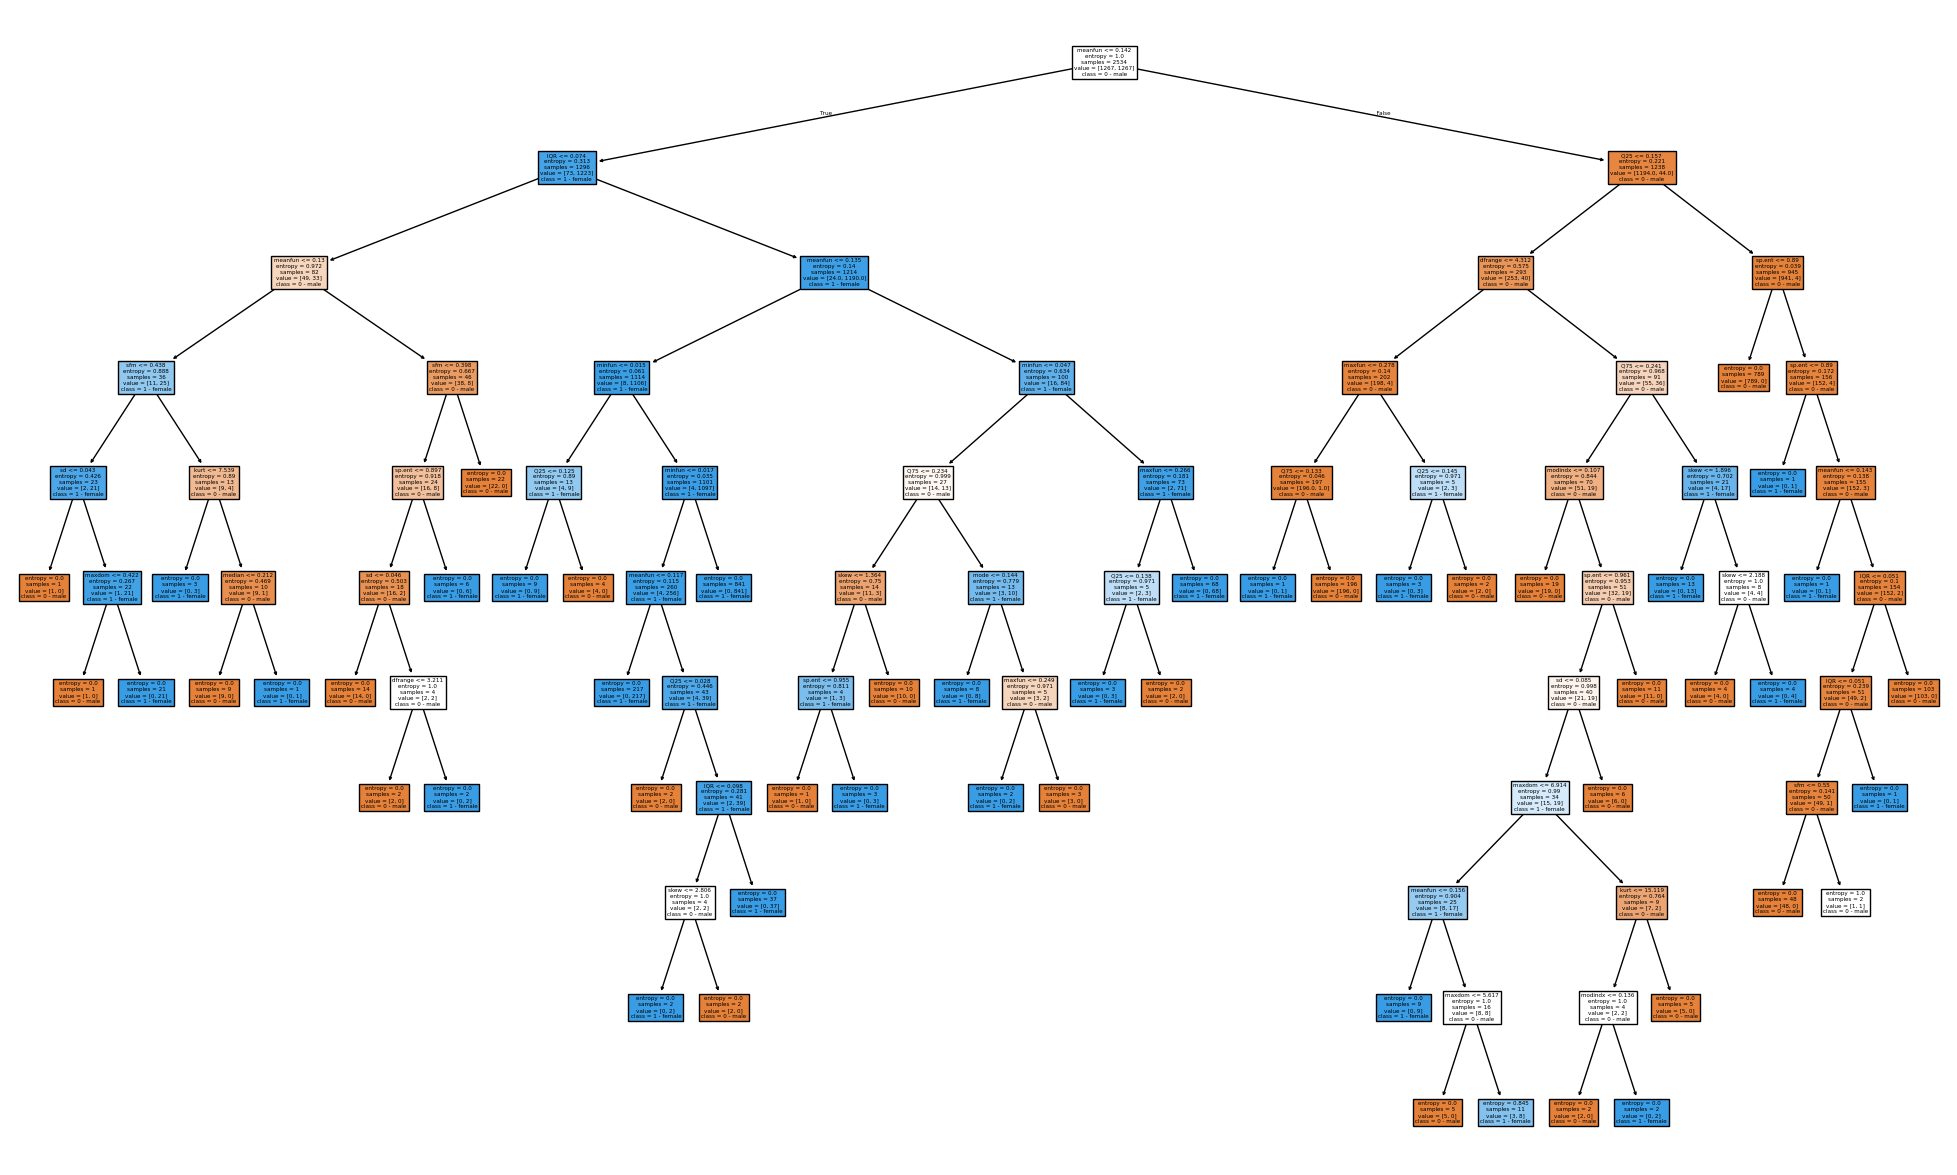

In [14]:
model_best = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
model_best.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_best, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

In [15]:
y_pred_best_test = model_best.predict(X_test)
y_pred_best_train = model_best.predict(X_train)
accuracy_best_test = accuracy_score(y_test, y_pred_best_test)
accuracy_best_train = accuracy_score(y_train, y_pred_best_train)
print("Точность оптимальной модели на тестовой выборке:", round(accuracy_best_test, 3))
print("Точность оптимальной модели на тренировочной выборке:", round(accuracy_best_train, 3))

Точность оптимальной модели на тестовой выборке: 0.97
Точность оптимальной модели на тренировочной выборке: 0.998


# Важность факторов

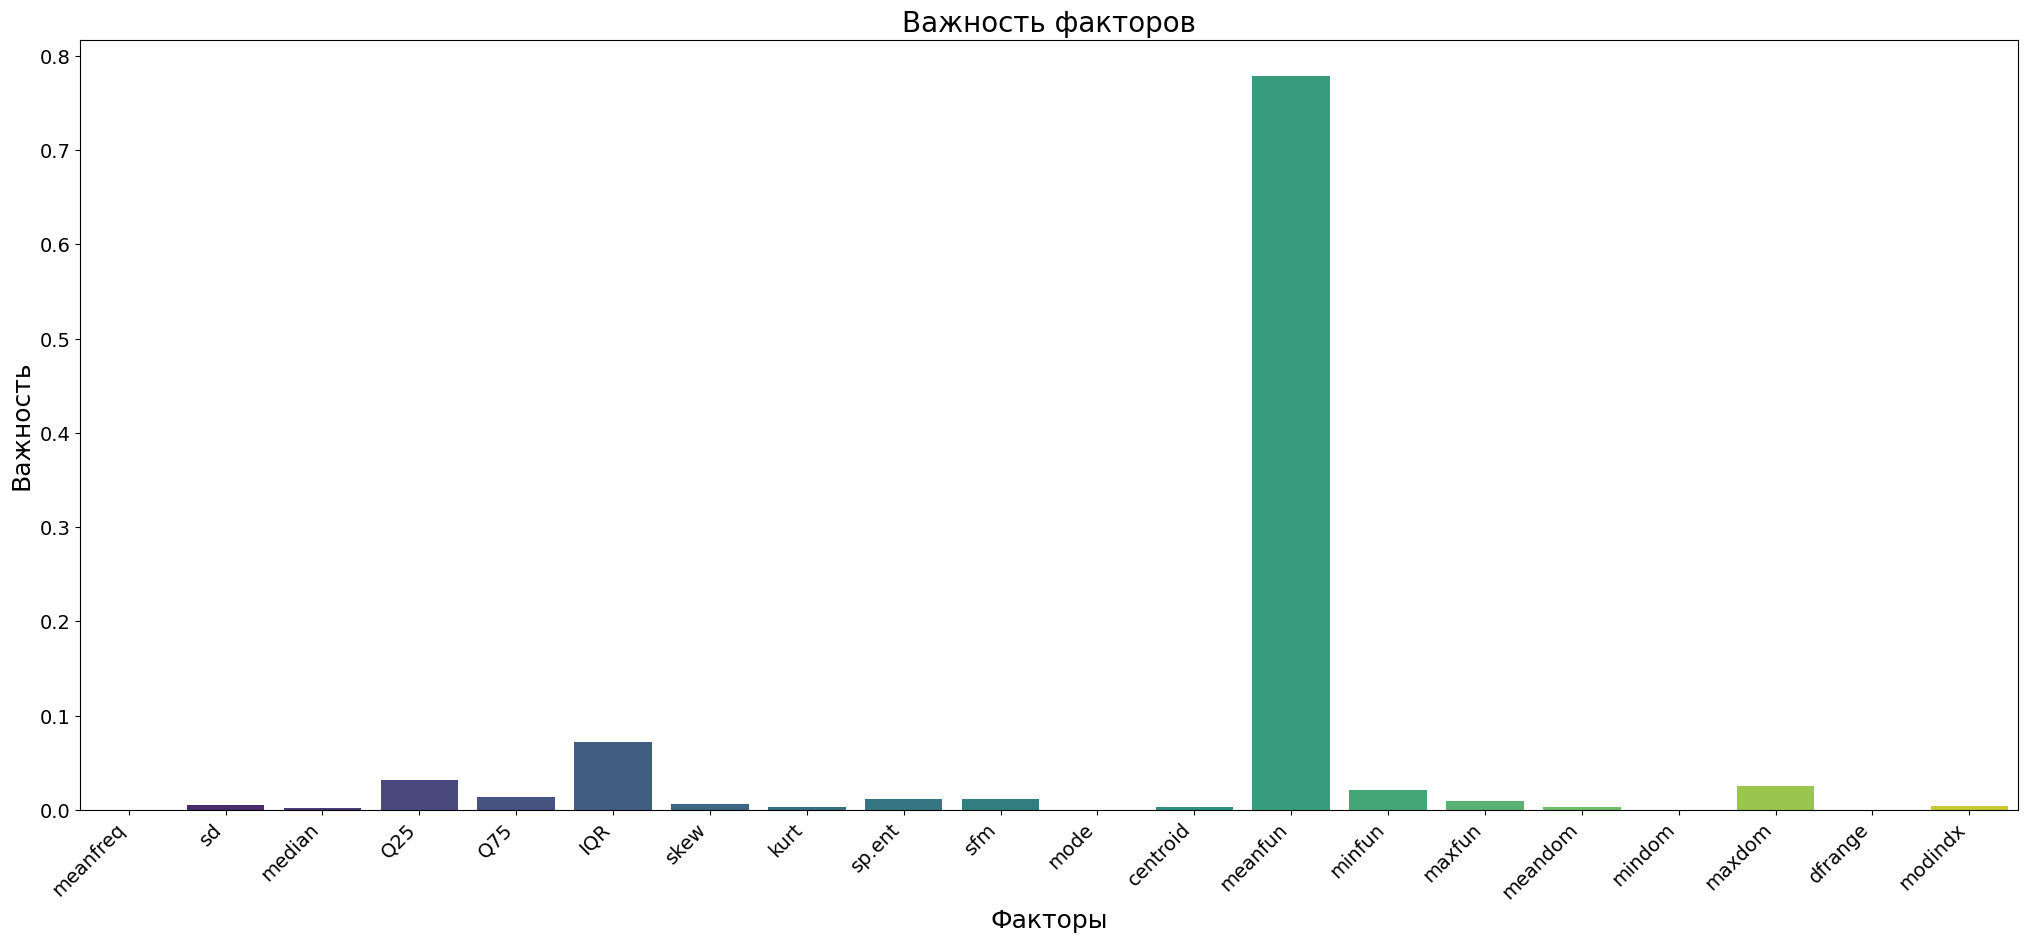

In [26]:
feature_importances = model_best.feature_importances_
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=features, y=feature_importances, ax=ax, palette="pastel")
ax.set_title('Важность факторов', fontsize=28)
ax.set_xlabel('Факторы', fontsize=20)
ax.set_ylabel('Важность', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=14)
plt.show()